<a href="https://colab.research.google.com/github/gu055805/MVP_An-liseDados/blob/main/MVP_AN%C3%81LISE_DADOS_e_BOAS_PR%C3%81TICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - An√°lise de Dados e Boas Pr√°ticas

**Nome:** Gustavo Barbieri  
**Matr√≠cula:** 4052024001478  
**Dataset:** Wine Quality Dataset (https://archive.ics.uci.edu/ml/datasets/wine+quality)


# Descri√ß√£o do Problema

O conjunto de dados Wine Quality √© um conjunto de dados multivariado que consiste em medi√ß√µes f√≠sico-qu√≠micas de amostras de vinho tinto da regi√£o do Vale do Douro, em Portugal. O objetivo principal √© prever a qualidade sensorial atribu√≠da ao vinho (em uma escala de 0 a 10) com base em onze caracter√≠sticas qu√≠micas do produto, como acidez vol√°til, teor alco√≥lico, densidade, pH, entre outras.

## Hip√≥teses do Problema

As hip√≥teses que tracei s√£o as seguintes:

- Vinhos com maior teor alco√≥lico tendem a receber melhores notas?

- A acidez vol√°til elevada est√° associada a uma menor qualidade sensorial?

- Existem vari√°veis f√≠sico-qu√≠micas fortemente correlacionadas que influenciam o resultado final da qualidade?

## Tipo de Problema

Este √© um problema de aprendizado supervisionado, pois o dataset possui uma vari√°vel-alvo conhecida (quality). Como essa vari√°vel √© num√©rica e pode assumir diferentes valores dentro de um intervalo, trata-se de um problema de regress√£o.

## Sele√ß√£o de Dados

O dataset Wine Quality √© amplamente utilizado em estudos de aprendizado de m√°quina e est√° dispon√≠vel no reposit√≥rio p√∫blico da UCI. N√£o foi necess√°rio fazer uma sele√ß√£o externa ou limpeza inicial, pois o dataset j√° est√° estruturado e pronto para uso.

## Atributos do Dataset

O dataset Wine Quality cont√©m 1599 amostras de vinhos tintos, cada uma com informa√ß√µes f√≠sico-qu√≠micas medidas em laborat√≥rio. Possui 12 atributos:

***fixed acidity*** (acidez fixa)

***volatile acidity*** (acidez vol√°til)

***citric acid*** (√°cido c√≠trico)

***residual sugar*** (a√ß√∫car residual)

***chlorides*** (cloretos)

***free sulfur dioxide*** (di√≥xido de enxofre livre)

***total sulfur dioxide*** (di√≥xido de enxofre total)

***density*** (densidade)

***pH***

***sulphates*** (sulfatos)

***alcohol*** (teor alco√≥lico)

***quality*** (nota de qualidade sensorial, de 0 a 10)

# Importa√ß√£o das Bibliotecas Necess√°rias e Carga de Dados

Esta se√ß√£o consolida todas as importa√ß√µes de bibliotecas necess√°rias para a an√°lise, visualiza√ß√£o e pr√©-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# An√°lise de Dados

A an√°lise explorat√≥ria tem como objetivo investigar as principais caracter√≠sticas do dataset Wine Quality, observando a distribui√ß√£o dos dados, poss√≠veis outliers e rela√ß√µes entre os atributos. Esses insights s√£o fundamentais para orientar decis√µes na prepara√ß√£o dos dados e no desenvolvimento de modelos preditivos.

## Total e Tipo das Inst√¢ncias

O dataset Wine Quality possui 1599 inst√¢ncias (observa√ß√µes), cada uma representando uma amostra de vinho tinto. Os 11 atributos f√≠sico-qu√≠micos s√£o do tipo num√©rico (float), assim como a vari√°vel-alvo quality, que tamb√©m √© num√©rica e representa uma nota sensorial.

In [3]:
print(f"N√∫mero de linhas: {df.shape[0]}")
print(f"N√∫mero de colunas: {df.shape[1]}")
df.info()


N√∫mero de linhas: 1599
N√∫mero de colunas: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
# Verificar a presen√ßa de valores nulos no dataset original
print("Total valor nulos no dataset Wine Quality:")
df.isnull().sum()

Total valor nulos no dataset Wine Quality:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

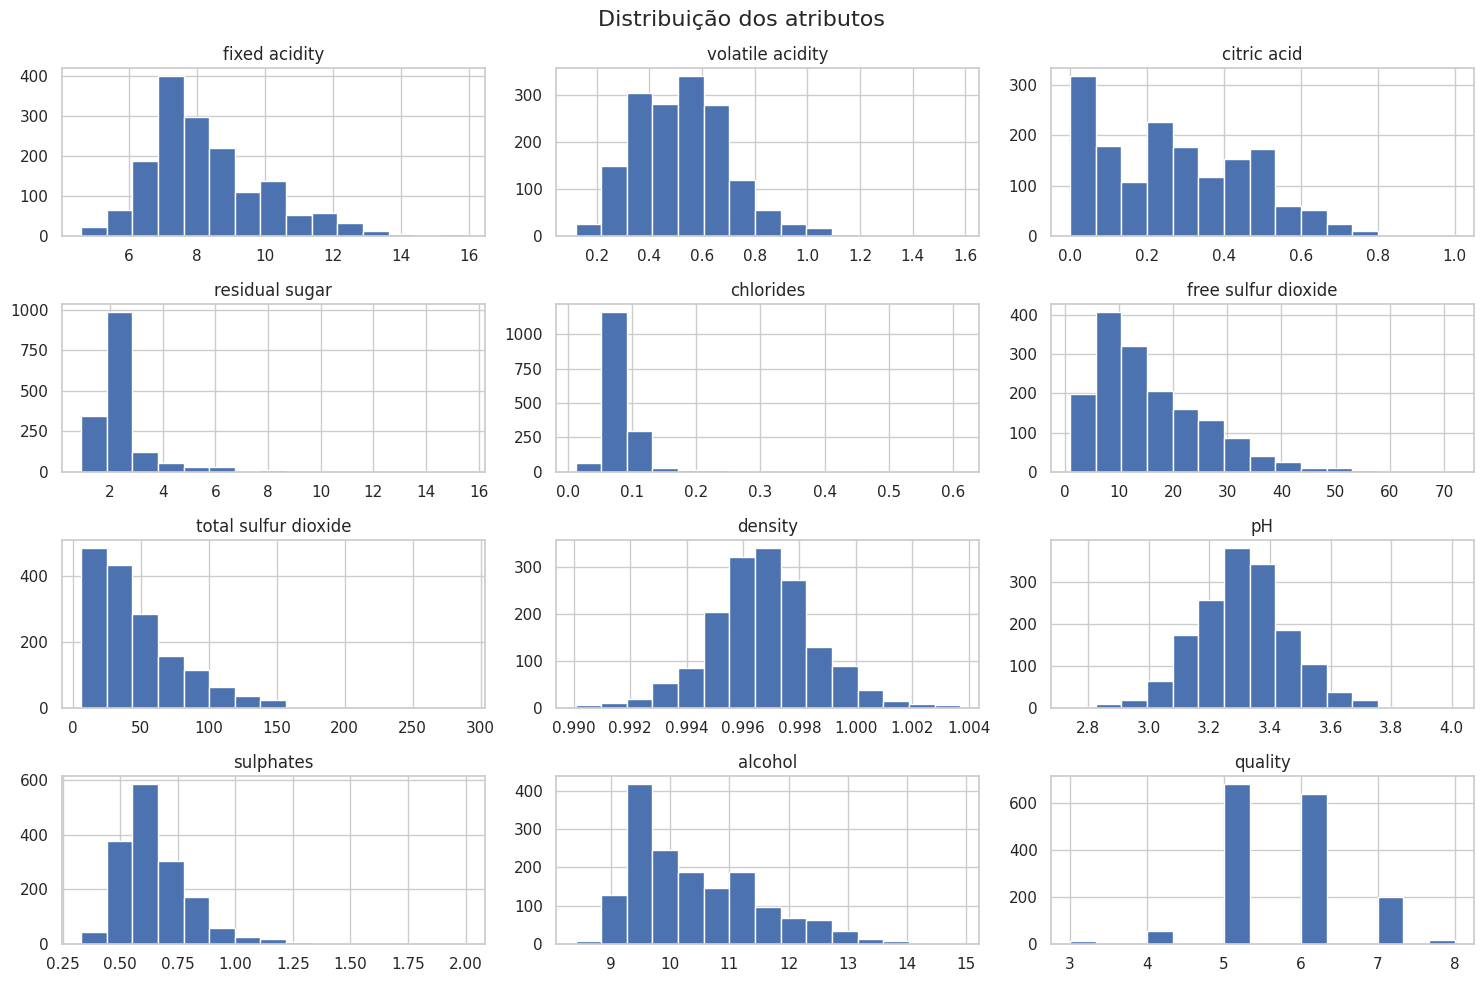

In [6]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle("Distribui√ß√£o dos atributos", fontsize=16)
plt.tight_layout()
plt.show()


A an√°lise dos histogramas revela que a maioria dos atributos apresenta distribui√ß√µes assim√©tricas ou concentradas em intervalos espec√≠ficos. Vari√°veis como residual sugar, free sulfur dioxide e total sulfur dioxide possuem caudas longas √† direita, indicando a presen√ßa de valores extremos. J√° atributos como density, pH e alcohol exibem distribui√ß√µes mais pr√≥ximas da normal.

A vari√°vel quality, que √© a vari√°vel-alvo, apresenta uma concentra√ß√£o em torno das notas 5, 6 e 7. Esse comportamento sugere um desbalanceamento, com poucas amostras em notas muito baixas ou muito altas, o que pode influenciar a capacidade dos modelos preditivos de generalizar bem em toda a faixa de qualidade.

## Estat√≠sticas Descritivas



In [9]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [16]:
stats_mean = df.describe().loc['mean']
stats_std = df.describe().loc['std']

print(stats_mean)
print(stats_std)


fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
Name: mean, dtype: float64
fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
Name: std, dtype: float64


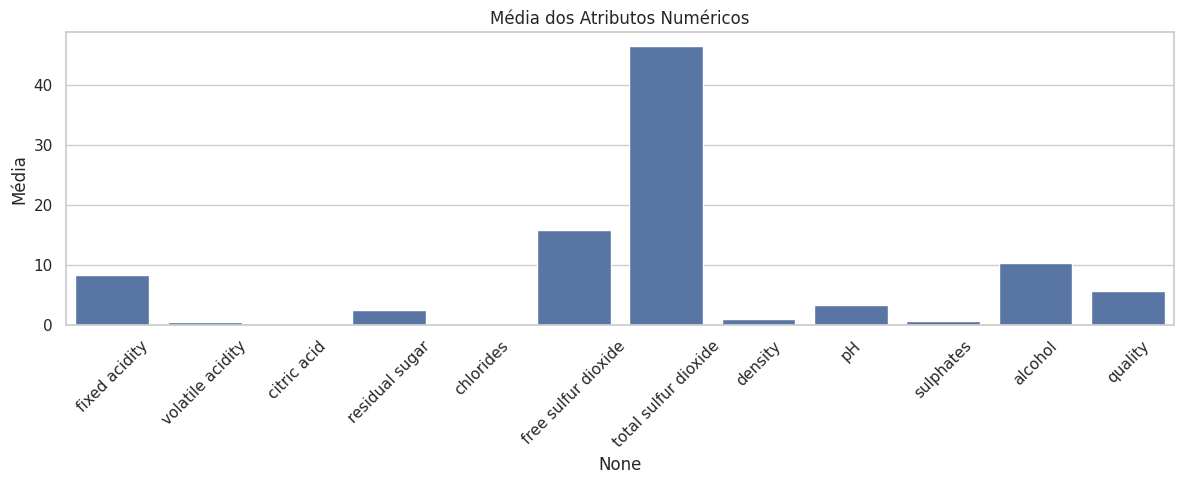

In [17]:
# Gr√°fico de barras da m√©dia dos atributos
plt.figure(figsize=(12, 5))
sns.barplot(x=stats_mean.index, y=stats_mean.values)
plt.title('M√©dia dos Atributos Num√©ricos')
plt.ylabel('M√©dia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O gr√°fico mostra que os atributos possuem escalas bastante diferentes, com m√©dias variando de valores muito pequenos (como chlorides) at√© valores mais altos (alcohol e total sulfur dioxide). Essa diferen√ßa pode impactar negativamente o desempenho de modelos que s√£o sens√≠veis √† escala dos dados, refor√ßando a import√¢ncia do pr√©-processamento.

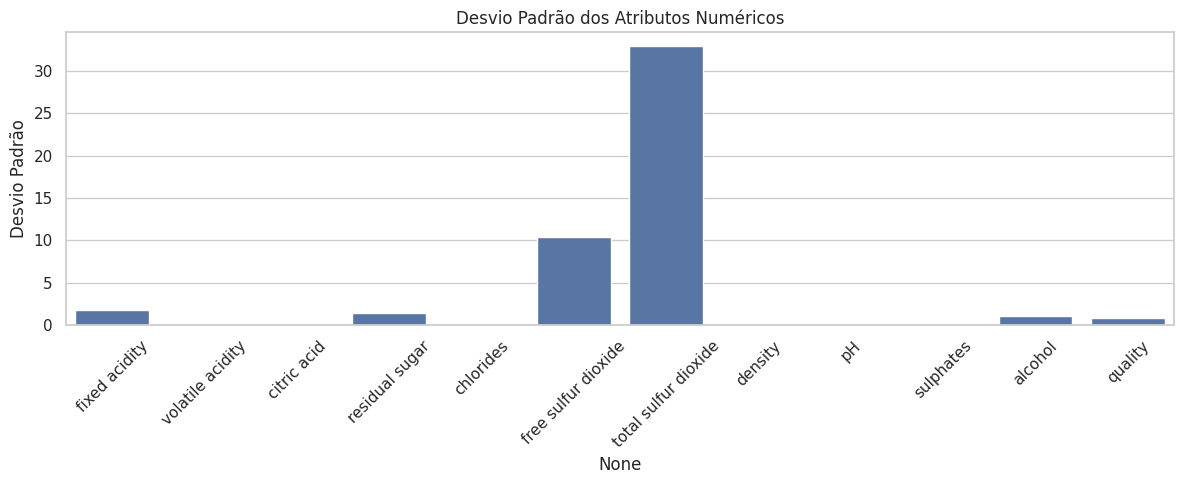

In [18]:
# Gr√°fico de barras do desvio padr√£o dos atributos
plt.figure(figsize=(12, 5))
sns.barplot(x=stats_std.index, y=stats_std.values)
plt.title('Desvio Padr√£o dos Atributos Num√©ricos')
plt.ylabel('Desvio Padr√£o')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O desvio padr√£o evidencia que algumas vari√°veis, como total sulfur dioxide e residual sugar, t√™m alta variabilidade, o que pode indicar a presen√ßa de outliers. J√° vari√°veis como pH e density s√£o mais est√°veis.Essas diferen√ßas justificam o uso de t√©cnicas como normaliza√ß√£o ou padroniza√ß√£o antes de treinar um modelo de machine learning.

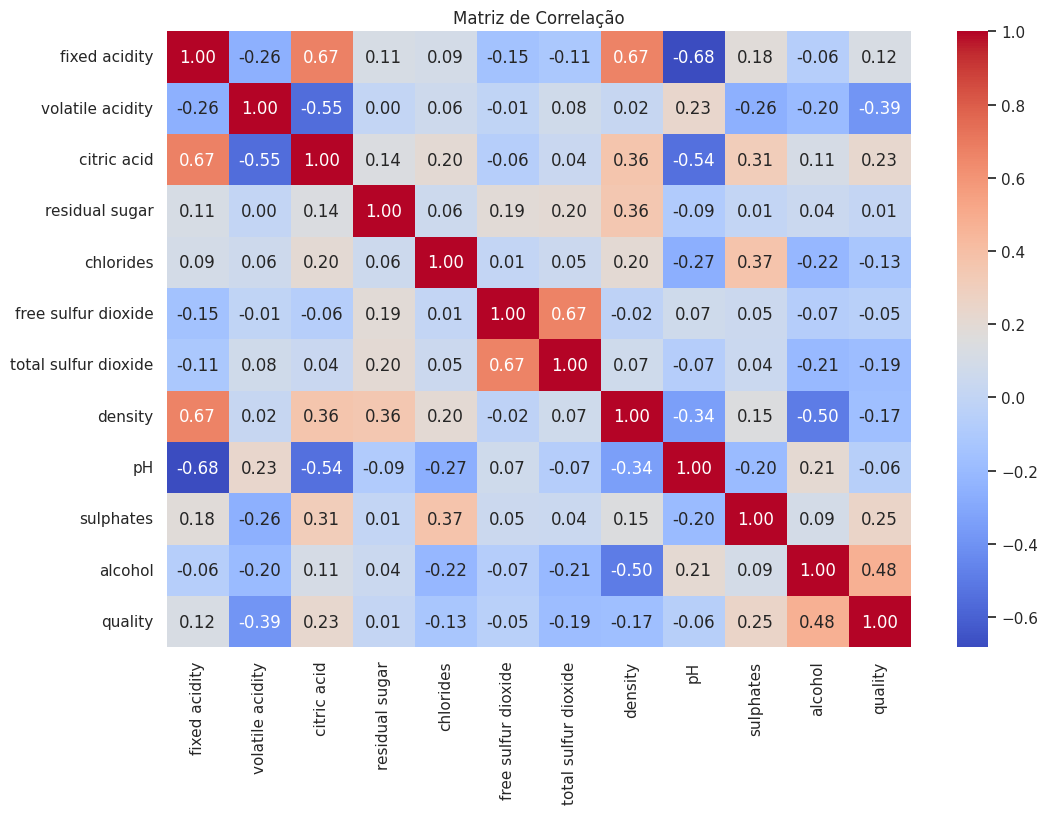

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correla√ß√£o")
plt.show()


A matriz de correla√ß√£o mostra que a vari√°vel alcohol tem a maior correla√ß√£o positiva com a qualidade do vinho (quality), sugerindo que vinhos com maior teor alco√≥lico tendem a ser melhor avaliados. J√° volatile acidity apresenta uma correla√ß√£o negativa moderada, indicando que vinhos mais √°cidos costumam ter menor qualidade. Al√©m disso, density e pH tamb√©m se destacam com correla√ß√µes negativas

# Pr√©-Processamento de Dados

Vamos dividir em treino/teste

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Separar X e y
X = df.drop('quality', axis=1)
y = df['quality']

# 2. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normaliza√ß√£o

In [25]:
# 3. Normalizar com base no treino
scaler = MinMaxScaler()
scaler.fit(X_train)  # Aprende min e max do treino

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Aplica os mesmos min/max no teste

# Antes da normaliza√ß√£o
print("Antes da normaliza√ß√£o (X_train):")
print(X_train.head())

# Depois da normaliza√ß√£o
print("\nDepois da normaliza√ß√£o (X_train_normalized):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())



Antes da normaliza√ß√£o (X_train):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
925             8.6              0.22         0.36             1.9      0.064   
363            12.5              0.46         0.63             2.0      0.071   
906             7.2              0.54         0.27             2.6      0.084   
426             6.4              0.67         0.08             2.1      0.045   
1251            7.5              0.58         0.14             2.2      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
925                  53.0                  77.0  0.99604  3.47       0.87   
363                   6.0                  15.0  0.99880  2.99       0.87   
906                  12.0                  78.0  0.99640  3.39       0.71   
426                  19.0                  48.0  0.99490  3.49       0.49   
1251                 27.0                  60.0  0.99630  3.28       0.59   

      alcohol  

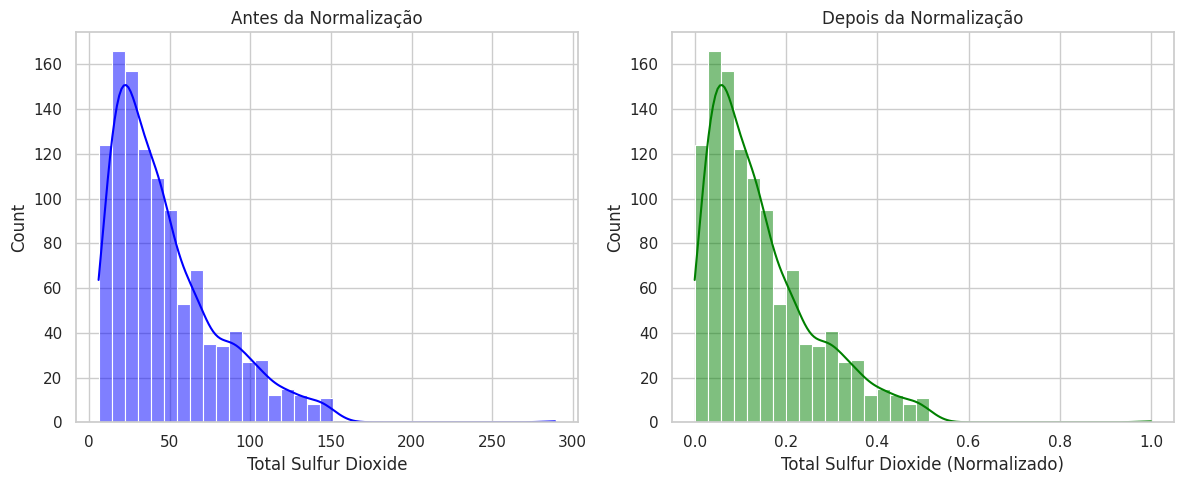

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Antes
plt.subplot(1, 2, 1)
sns.histplot(X_train['total sulfur dioxide'], kde=True, color='blue')
plt.title('Antes da Normaliza√ß√£o')
plt.xlabel('Total Sulfur Dioxide')

# Depois
plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, X_train.columns.get_loc('total sulfur dioxide')], kde=True, color='green')
plt.title('Depois da Normaliza√ß√£o')
plt.xlabel('Total Sulfur Dioxide (Normalizado)')

plt.tight_layout()
plt.show()



A visualiza√ß√£o comparativa mostra que a normaliza√ß√£o via MinMaxScaler ajusta os dados para a faixa de 0 a 1, preservando o formato da distribui√ß√£o original. Foi importante a normaliza√ß√£o para tratar as diferen√ßas de escalas entre as features para n√£o 'sujar' o treinamento do modelo.

# Sele√ß√£o de Atributos

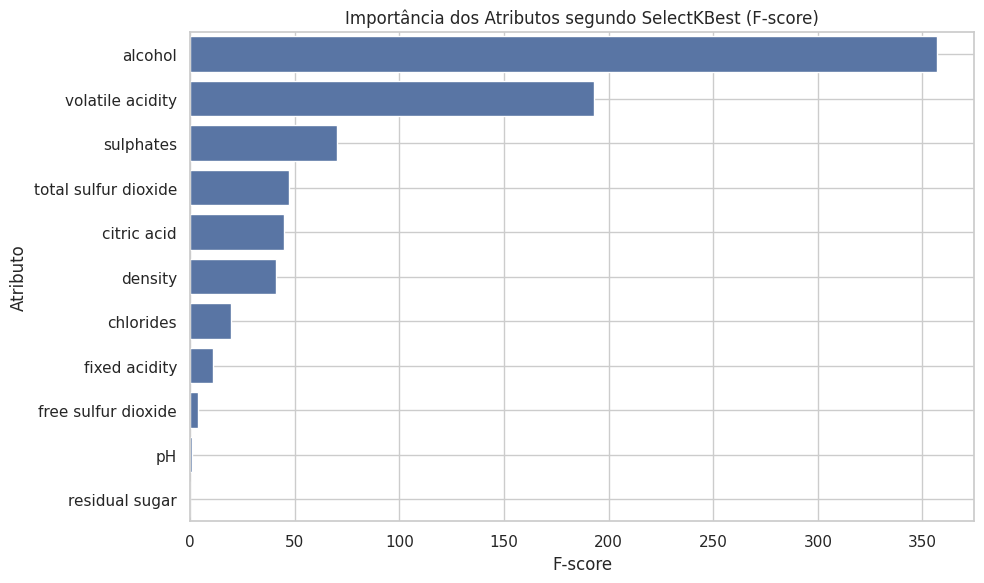

In [30]:


from sklearn.feature_selection import SelectKBest, f_regression

# Aplicar SelectKBest com f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_scaled, y_train)
scores = selector.scores_

# Criar DataFrame para visualiza√ß√£o
feature_scores = pd.DataFrame({'Atributo': X.columns, 'Score F': scores})
feature_scores = feature_scores.sort_values(by='Score F', ascending=False)

# Plotar gr√°fico
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores, x='Score F', y='Atributo')
plt.title('Import√¢ncia dos Atributos segundo SelectKBest (F-score)')
plt.xlabel('F-score')
plt.ylabel('Atributo')
plt.tight_layout()
plt.grid(True)
plt.show()

Os atributos alcohol, volatile acidity e sulphates s√£o os que mais se destacam na rela√ß√£o com a qualidade do vinho. Isso quer dizer que eles ajudam bastante o modelo a entender e prever se um vinho ser√° bem avaliado ou n√£o. J√° os outros atributos t√™m menor influ√™ncia e podem ser considerados menos importantes para o modelo.

# Conclus√£o
---

A an√°lise e o pr√©-processamento do dataset de vinhos evidenciaram a import√¢ncia de entender a estrutura dos dados antes de aplicar algoritmos de aprendizado de m√°quina. O conjunto de dados √© limpo, composto apenas por vari√°veis num√©ricas, e apresenta uma boa base para testes preditivos com foco na qualidade do vinho.

A an√°lise explorat√≥ria revelou a exist√™ncia de assimetrias em algumas distribui√ß√µes, al√©m de correla√ß√µes relevantes, como entre alcohol e quality. T√©cnicas de normaliza√ß√£o foram aplicadas para adequar a escala dos dados, o que √© especialmente √∫til em modelos sens√≠veis √† magnitude dos atributos. Al√©m disso, utilizamos o SelectKBest com F-score para avaliar a relev√¢ncia das vari√°veis, permitindo selecionar automaticamente as mais importantes e filtrar aquelas com baixa contribui√ß√£o.

As hip√≥teses iniciais tamb√©m puderam ser investigadas:

Certos atributos impactam mais diretamente na qualidade do vinho?
Sim. Alcohol, volatile acidity e sulphates foram os que mais se destacaram como relevantes para prever a qualidade.

A normaliza√ß√£o ajuda na prepara√ß√£o do modelo?
Sim. A normaliza√ß√£o ajustou a escala dos dados sem alterar sua distribui√ß√£o, tornando o treinamento mais est√°vel.

Faz sentido aplicar redu√ß√£o de dimensionalidade?
Embora o n√∫mero de atributos n√£o seja alto, a sele√ß√£o autom√°tica de vari√°veis com baixa relev√¢ncia pode simplificar o modelo sem perda significativa de desempenho.

Com isso, o dataset est√° pronto para a pr√≥xima etapa: aplica√ß√£o e compara√ß√£o de modelos de machine learning para prever a qualidade dos vinhos com base em suas caracter√≠sticas f√≠sico-qu√≠micas.



## Pr√≥ximos Passos:
---
- Aplicar modelos de regress√£o linear, √°rvore de decis√£o ou Random Forest para prever a vari√°vel `quality`.
- Explorar a possibilidade de transformar `quality` em categorias para abordar como um problema de classifica√ß√£o.
- Dividir o df em dois para treinar o modelo com todas as features e o outro com somente as features com os maiores f score.




# Requisitos

---

### üîπ An√°lise de Dados

- **Quantos atributos e inst√¢ncias existem?**  
  12 colunas (11 atributos + 1 alvo), 1599 inst√¢ncias.

- **Quais s√£o os tipos de dados dos atributos?**  
  Todos os atributos s√£o num√©ricos (float64 ou int64).

- **Verifique as primeiras linhas do dataset. Algo chama a aten√ß√£o?**  
  Os dados est√£o bem organizados, sem valores nulos. Algumas vari√°veis como `residual sugar` e `sulphates` mostram valores extremos.

- **H√° valores faltantes, discrepantes ou inconsistentes?**  
  N√£o h√° valores nulos. Detectaram-se alguns outliers naturais em atributos como a√ß√∫car residual.

- **Fa√ßa um resumo estat√≠stico. O que percebe?**  
  A maioria das vari√°veis tem distribui√ß√£o assim√©trica e escalas diferentes, justificando a normaliza√ß√£o posterior.

- **Verifique a distribui√ß√£o de cada atributo. O que percebe?**  
  As distribui√ß√µes s√£o variadas: algumas sim√©tricas, outras com caudas longas (ex: `sulphates`, `chlorides`).  

- **Se for classifica√ß√£o, verifique a distribui√ß√£o das classes.**  
  N√£o se aplica diretamente, pois `quality` √© cont√≠nua. No entanto, observa-se concentra√ß√£o de notas entre 5 e 6.

- **Analise atributos combinados (correla√ß√£o):**  
  `alcohol` tem correla√ß√£o positiva com `quality`.  
  `volatile acidity` tem correla√ß√£o negativa moderada com `quality`.

---

### üîπ Pr√©-processamento

- **Quais opera√ß√µes de pr√©-processamento foram realizadas?**  
  - Verifica√ß√£o de valores nulos  
  - Normaliza√ß√£o Min-Max nos atributos preditores  
  - Recria√ß√£o do dataset normalizado

- **Justifique cada transforma√ß√£o realizada:**  
  A normaliza√ß√£o foi aplicada para alinhar as escalas dos atributos antes da aplica√ß√£o de modelos, pois vari√°veis como `alcohol` e `sulphates` tinham ordens de magnitude diferentes.

- **Valores nulos foram tratados?**  
  N√£o havia valores nulos a tratar.

- **Alguma nova an√°lise foi feita ap√≥s o pr√©-processamento?**  
  Sim, boxplots e an√°lise visual p√≥s-normaliza√ß√£o indicam que a escala dos dados foi padronizada corretamente.

---